# ロジステック回帰 - pystan

In [1]:
from __future__ import division
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
%precision 4
#plt.style.use('ggplot')
import seaborn as sns
sns.set_style('white')
sns.set_context('paper')

np.random.seed(1234)
import pystan
import scipy.stats as stats

import scipy.stats as stats

## ロジステック回帰による女性・男性決定問題

- 身長，体重データを利用して女性・男性を決定する問題を扱う．
- データはpandasのデータフレームとして渡す(データの単位は不明…．foot/poundでない)

In [2]:
# observed data
df = pd.read_csv('data/HtWt.csv')
df.head()

,male,height,weight
0,0,63.2,168.7
1,0,68.7,169.8
2,0,64.8,176.6
3,0,67.9,246.8
4,1,68.9,151.6


In [3]:
log_reg_code = """
data {
    int<lower=0> n;
    int male[n];
    real weight[n];
    real height[n];
}
transformed data {}
parameters {
    real a;
    real b;
    real c;
}
transformed parameters {}
model {
    a ~ normal(0, 10);
    b ~ normal(0, 10);
    c ~ normal(0, 10);
    for(i in 1:n) {
        male[i] ~ bernoulli(inv_logit(a*weight[i] + b*height[i] + c));
  }
}
generated quantities {}
"""

log_reg_dat = {
             'n': len(df),
             'male': df.male,
             'height': df.height,
             'weight': df.weight
            }

fit = pystan.stan(model_code=log_reg_code, data=log_reg_dat, iter=2000, chains=1)

In [4]:
print(fit)

Inference for Stan model: anon_model_1d884862dfc8cc07454a0c3bd709994b.
1 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=1000.

       mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a       0.5 10.0e-4 1.7e-3   0.49   0.49    0.5    0.5    0.5      3   2.12
b     -1.38  3.9e-3 6.7e-3  -1.39  -1.39  -1.38  -1.37  -1.37      3   2.13
c     -0.34  1.3e-3 2.9e-3  -0.34  -0.34  -0.34  -0.34  -0.33      5   1.34
lp__ -511.8     2.8   4.85 -517.8 -515.4 -514.3 -507.2 -502.7      3    2.0

Samples were drawn using NUTS(diag_e) at Fri Oct  9 08:07:19 2015.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


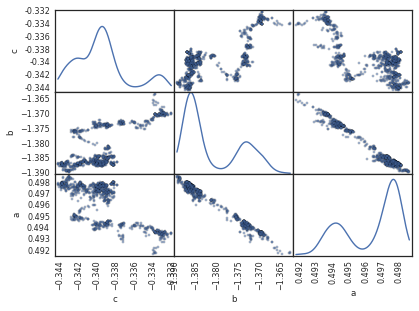

In [5]:
df_trace = pd.DataFrame(fit.extract(['c', 'b', 'a']))
pd.scatter_matrix(df_trace[:], diagonal='kde');